In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

## Create Data Set

In [15]:
r = np.tile(np.r_[0:1:100j], 3)
t = np.r_[0:np.pi*4:300j] + np.random.random(300)
X = np.c_[r*np.cos(t), r*np.sin(t)]
y = np.repeat(np.arange(3), 100)

In [17]:
#plt.scatter(*X.T, c=y, cmap=plt.cm.Paired)

In [70]:
class NeuralNet(nn.Module):
    def __init__(self, num_hidden):
        super().__init__()
        self.seq = nn.Sequential(
        nn.Linear(2, num_hidden),
        nn.ReLU(),
        #nn.Linear(num_hidden, num_hidden),
        #nn.ReLU(),
        nn.Linear(num_hidden, 3))
        
    def forward(self, X):
        return self.seq(X)

In [71]:
net1 = NeuralNet(1024)

In [72]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net1.parameters())

In [73]:
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).long()

Loss is 1.0822783708572388 at iter 0


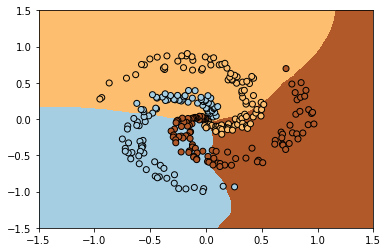

Loss is 0.39430052042007446 at iter 100


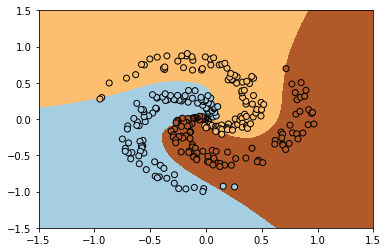

Loss is 0.20629458129405975 at iter 200


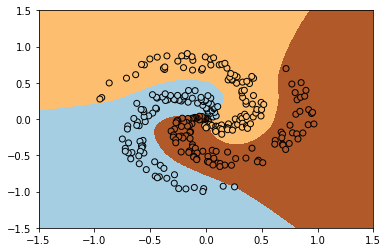

Loss is 0.13824474811553955 at iter 300


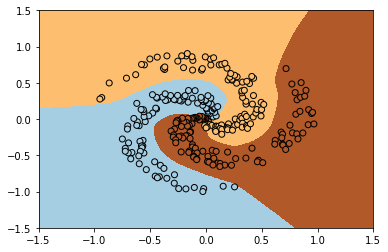

Loss is 0.10441703349351883 at iter 400


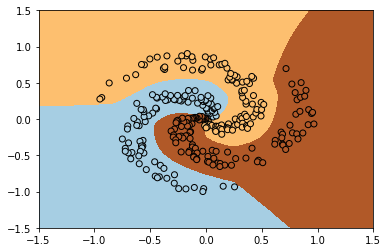

Loss is 0.08382808417081833 at iter 500


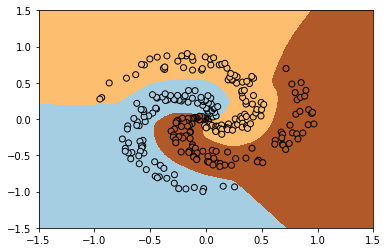

Loss is 0.06996794044971466 at iter 600


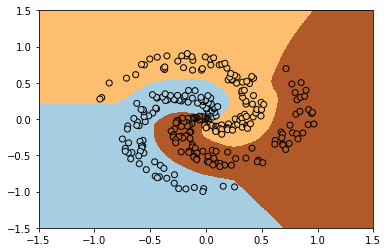

Loss is 0.059909090399742126 at iter 700


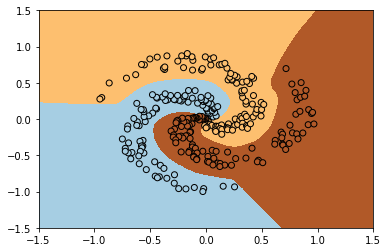

Loss is 0.05230826511979103 at iter 800


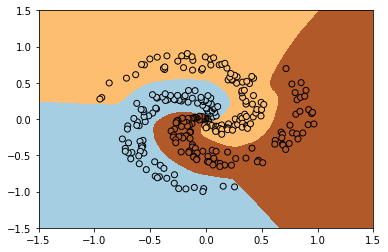

Loss is 0.04647790268063545 at iter 900


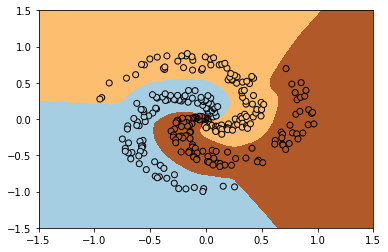

In [74]:
for iter in range(1000):
    y_score = net1(X_tensor)
    optimizer.zero_grad()
    loss = loss_fn(y_score, y_tensor)
    loss.backward()
    optimizer.step()
    
    if iter % 100 == 0:
        print(f'Loss is {loss} at iter {iter}')
        plot_decision_boundary()

In [61]:
def plot_decision_boundary():
    X_grid = np.meshgrid(np.r_[-1.5:1.5:1000j], np.r_[-1.5:1.5:1000j])

    X_grid_tensor = torch.from_numpy(np.c_[[e.ravel() for e in X_grid]].T).float()

    y_pred = net1(X_grid_tensor).argmax(1).detach().numpy()

    plt.pcolormesh(*X_grid, y_pred.reshape(X_grid[0].shape), cmap=plt.cm.Paired)
    plt.scatter(*X.T, c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.show()